In [42]:
# Input data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# URL ke file Excel
url = "https://raw.githubusercontent.com/Raziqizzan03/MPDW/main/data/(Full%20Data)%20Data%20Pendatang%20Mancanegara%20di%20Provinsi%20Bali%20(1).csv"

# Membaca file Excel ke dalam DataFrame
data = pd.read_csv(url)
hapus = ['Bulan-Tahun']
data = data.drop(hapus,axis=1)

# Menampilkan beberapa baris pertama data untuk memastikan pembacaan berhasil
print(data)

     Periode  Jumlah
0          1  174541
1          2  147704
2          3  168205
3          4  188776
4          5  190803
..       ...     ...
172      173  439475
173      174  478198
174      175  541353
175      176  522141
176      177  508350

[177 rows x 2 columns]


# Eksplorasi data

Jumlah data latih: 166
Jumlah data uji: 11


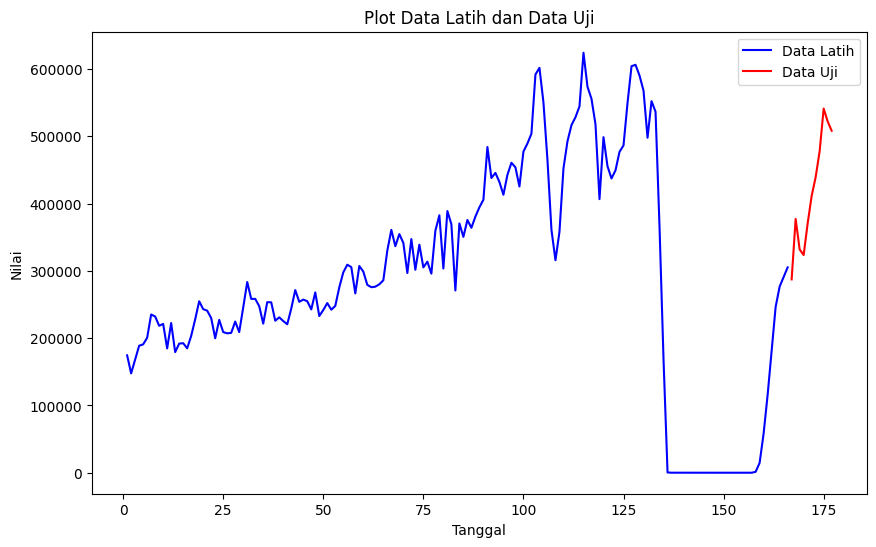

In [43]:
# Memisahkan data menjadi data latih dan data uji
train_data = data.iloc[:166]  # Ambil 166 data pertama sebagai data latih
test_data = data.iloc[166:]   # Ambil 11 data sisanya sebagai data uji

# Menampilkan jumlah data dalam setiap bagian untuk memastikan pemisahan yang benar
print("Jumlah data latih:", len(train_data))
print("Jumlah data uji:", len(test_data))

# Membuat plot data latih dan data uji
plt.figure(figsize=(10, 6))
plt.plot(train_data['Periode'], train_data['Jumlah'], label='Data Latih', color='blue')
plt.plot(test_data['Periode'], test_data['Jumlah'], label='Data Uji', color='red')
plt.title('Plot Data Latih dan Data Uji')
plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.legend()
plt.show()

# Analisis LSTM

In [44]:
# Bandingin AIC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Mengambil kolom Jumlah Wisatawan sebagai data yang akan diprediksi
time_series_data = data['Jumlah'].values.reshape(-1, 1)

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
time_series_data = scaler.fit_transform(time_series_data)

# Membagi dataset menjadi data latih dan data uji
train_size = 163
test_size = len(time_series_data) - train_size

train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Fungsi untuk membuat dataset dengan sekuens deret waktu
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 3

# Membuat dataset dengan sekuens deret waktu
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

# Memisahkan fitur dan target
y_train = X_train[:, -1]
X_train = X_train[:, :-1]
y_test = X_test[:, -1]
X_test = X_test[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Fungsi untuk membuat model LSTM
def create_model():
    model = Sequential()
    model.add(LSTM(40, activation='relu', input_shape=(seq_length - 1, 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Fungsi untuk menghitung AIC
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

# Inisialisasi model
model = create_model()

# List untuk menyimpan nilai AIC pada setiap epoch
aic_values = []

# Jumlah epoch yang akan diuji
epochs_to_test = [10, 20, 30, 40, 50]

# Melatih model sambil menghitung AIC hanya pada epoch yang diinginkan
for epoch in epochs_to_test:
    history = model.fit(X_train, y_train, epochs=epoch, batch_size=32, verbose=0)
    
    # Prediksi dengan model
    y_pred = model.predict(X_test)
    
    # Menghitung MSE
    mse = mean_squared_error(y_test, y_pred)
    
    # Menghitung AIC
    n = len(y_test)
    num_params = len(model.trainable_weights)  # Jumlah parameter model, bisa berbeda tergantung arsitektur
    aic = calculate_aic(n, mse, num_params)
    
    # Menyimpan nilai AIC
    aic_values.append(aic)
    print(f"Epoch {epoch} - AIC: {aic}")

# Menampilkan nilai AIC per epoch yang diuji
print(aic_values)


1/1 [==============================] - 0s 182ms/step
Epoch 10 - AIC: -15.947799127258104
1/1 [==============================] - 0s 22ms/step
Epoch 20 - AIC: -46.65944272041788
1/1 [==============================] - 0s 26ms/step
Epoch 30 - AIC: -46.73744354532994
1/1 [==============================] - 0s 22ms/step
Epoch 40 - AIC: -47.093206698244906
1/1 [==============================] - 0s 22ms/step
Epoch 50 - AIC: -47.84242125131145
[-15.947799127258104, -46.65944272041788, -46.73744354532994, -47.093206698244906, -47.84242125131145]


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Mengambil kolom Jumlah Wisatawan sebagai data yang akan diprediksi
time_series_data = data['Jumlah'].values.reshape(-1, 1)

# Normalisasi data ke rentang 0-1
scaler = MinMaxScaler()
time_series_data = scaler.fit_transform(time_series_data)

# Membagi dataset menjadi data latih dan data uji
train_size = 163
test_size = len(time_series_data) - train_size

train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Fungsi untuk membuat dataset dengan sekuens deret waktu
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
    return np.array(sequences)

# Panjang sekuens deret waktu (jumlah waktu sebelum prediksi)
seq_length = 3

# Membuat dataset dengan sekuens deret waktu
X_train = create_sequences(train_data, seq_length)
X_test = create_sequences(test_data, seq_length)

# Memisahkan fitur dan target
y_train = X_train[:, -1]
X_train = X_train[:, :-1]
y_test = X_test[:, -1]
X_test = X_test[:, :-1]

# Reshaping data untuk LSTM (jumlah sampel, panjang sekuens, jumlah fitur)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=5)

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50


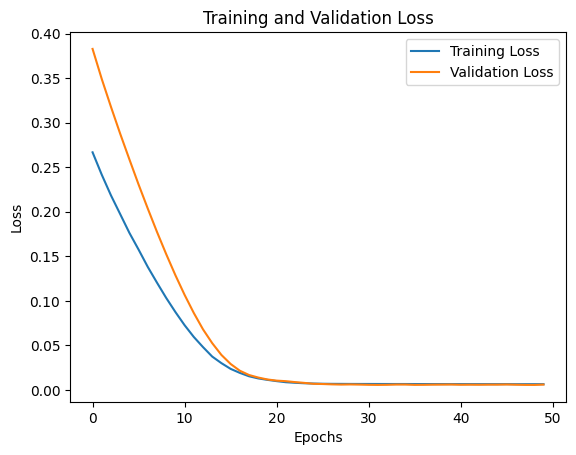

In [46]:
# Plot loss pada setiap epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 182ms/step


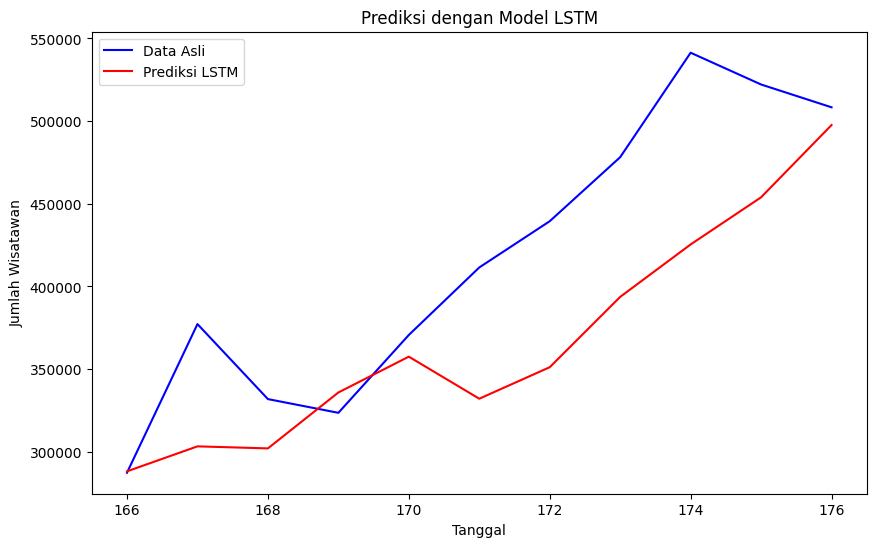

In [47]:
# Membuat prediksi dengan model LSTM
predicted1 = model.predict(X_test)

# Invers transform hasil prediksi ke skala aslinya
predictLSTM = scaler.inverse_transform(np.concatenate((X_test[:, -1], predicted1.reshape(-1, 1)), axis=1))[:, 1]

# Plot hasil prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[train_size + seq_length:], data['Jumlah'].values[train_size + seq_length:], label='Data Asli', color='blue')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='red')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()


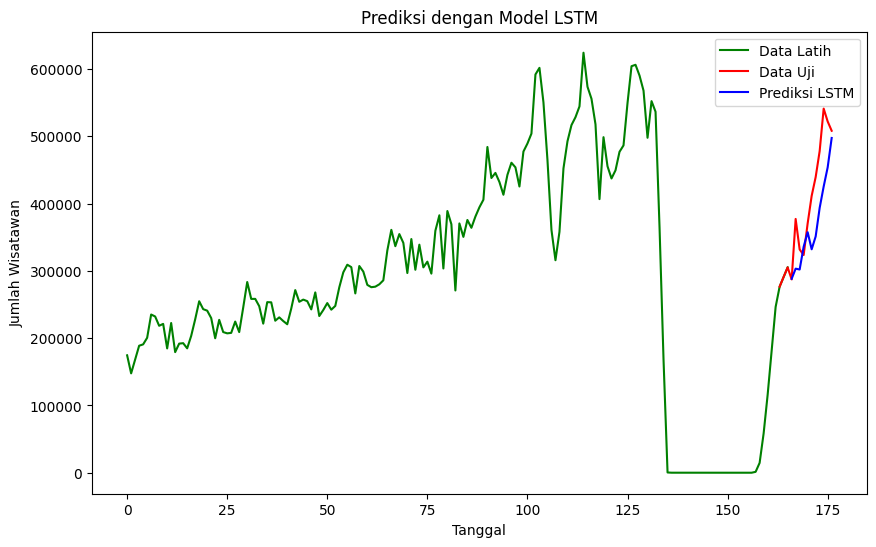

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Plot data latih dan data uji beserta prediksi
plt.figure(figsize=(10, 6))
plt.plot(data.index[:166], data['Jumlah'].values[:166], label='Data Latih', color='green')
plt.plot(data.index[train_size:], data['Jumlah'].values[train_size:], label='Data Uji', color='red')
plt.plot(data.index[train_size + seq_length:], predictLSTM, label='Prediksi LSTM', color='blue')
plt.title('Prediksi dengan Model LSTM')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Wisatawan')
plt.legend()
plt.show()

In [49]:
# Cek MAPE

# Mengambil nilai aktual dari data uji (setelah invers transformasi)
actual_values_test =  data['Jumlah'].values[train_size + seq_length:]
predicted_values_test = predictLSTM

from sklearn.metrics import mean_absolute_percentage_error

MAPE_test = mean_absolute_percentage_error(actual_values_test, predicted_values_test)

print(f"MAPE_test = {round(MAPE_test * 100,2)} %")

MAPE_test = 11.8 %


In [50]:
print(actual_values_test)
print(predicted_values_test)

[287398 377276 331912 323623 370695 411510 439475 478198 541353 522141
 508350]
[288233.41578186 303339.68910611 302106.42140567 335918.53256798
 357575.24035192 332148.54198718 351200.20016098 393727.07682157
 425430.19564199 453936.1370759  497626.57775235]


In [51]:
import pandas as pd

# Ubah array numpy menjadi DataFrame
predicted_df = pd.DataFrame(predicted_values_test, columns=['prediksi'])  # Sesuaikan dengan nama kolom yang sesuai

# Simpan DataFrame ke file CSV
predicted_df.to_csv('/kaggle/working/prediksiLSTM1.csv', index=False)

# Simpan DataFrame ke dalam file Excel
predicted_df.to_excel('/kaggle/working/prediksiLSTM3.xlsx', index=False)

## Prediksi 20 periode kedepan

In [52]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, SimpleRNN
import matplotlib.pyplot as plt

# Select the relevant column
# Adjust column names based on your dataset
# Buat ARRAy untuk bisa dipake lstm
target = data['Jumlah'].values.reshape(-1, 1)

Epoch 1/50
157/157 [==============================] - 2s 5ms/step - loss: 0.0779
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0240
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0209
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0164
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0165
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0137
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0124
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0123
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.0104
Epoch 10/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0095
Epoch 11/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0094
Epoch 12/50
157/157 [==============================] - 1s 5ms/step - loss: 0.0081
Epoch 13/50
157/157 [====

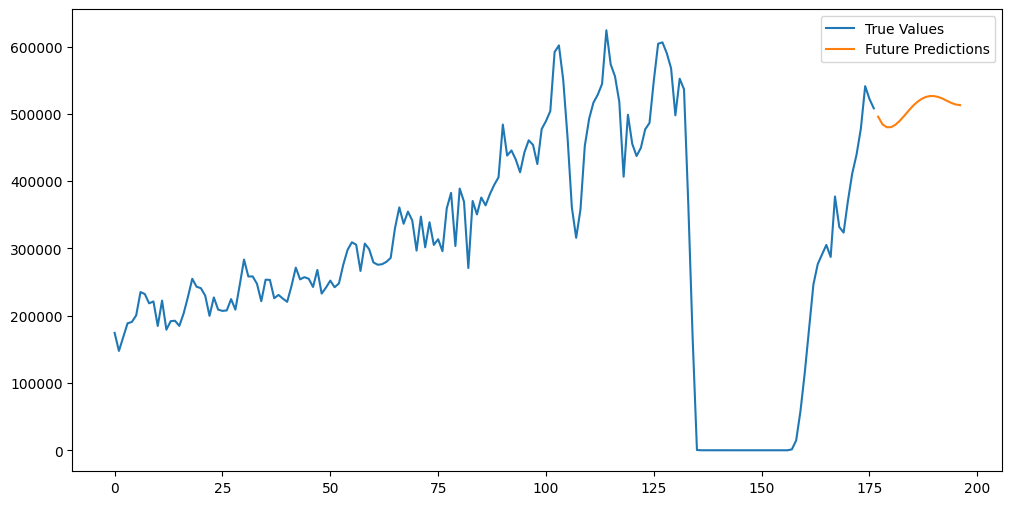

In [53]:

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler.fit_transform(target)

# Define the number of time steps for each input sample
time_steps = 20  # You can adjust this based on your dataset

# Prepare the data in the format expected by LSTM
X, y = [], []
for i in range(len(scaled_target) - time_steps):
    X.append(scaled_target[i:i + time_steps, 0])
    y.append(scaled_target[i + time_steps, 0])

X, y = np.array(X), np.array(y)

# Reshape data to match the input shape of the LSTM model (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=50, batch_size=1)

# Predict future values
future_steps = 20  # Set the number of future steps you want to predict
future_data = scaled_target[-time_steps:, :]

future_predictions = []
for _ in range(future_steps):
    # Reshape the data to match the input shape of the model
    future_input = future_data.reshape((1, time_steps, 1))

    # Make the prediction
    future_pred = model.predict(future_input)

    # Append the prediction to the results
    future_predictions.append(future_pred[0, 0])

    # Update the input data for the next prediction
    future_data = np.vstack((future_data[1:], future_pred))

# Inverse transform the predictions to the original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(target, label='True Values')
plt.plot(np.arange(len(target), len(target) + future_steps), future_predictions, label='Future Predictions')
plt.legend()
plt.show()

In [54]:
import pandas as pd

# Ubah array numpy menjadi DataFrame
predicted_20 = pd.DataFrame(future_predictions, columns=['prediksi20'])  # Sesuaikan dengan nama kolom yang sesuai

# Simpan DataFrame ke file CSV
predicted_20.to_csv('/kaggle/working/prediksi20.csv', index=False)

# Simpan DataFrame ke dalam file Excel
predicted_20.to_excel('/kaggle/working/prediksi20(2).xlsx', index=False)